In [29]:
import pandas as pd

# Load the dataset
file_path = 'D:\VIT Syllabus\Sem 5\BCSE301 - Software Engineering\Space Debris\space_decay.csv'  # The path to your uploaded file
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Display the summary statistics for the dataset
print(df.describe())

# Check for missing values in the dataset
print(df.isnull().sum())


   CCSDS_OMM_VERS                            COMMENT        CREATION_DATE  \
0               2  GENERATED VIA SPACE-TRACK.ORG API  2021-11-01T06:46:11   
1               2  GENERATED VIA SPACE-TRACK.ORG API  2021-11-01T04:58:37   
2               2  GENERATED VIA SPACE-TRACK.ORG API  2021-11-01T06:26:11   
3               2  GENERATED VIA SPACE-TRACK.ORG API  2021-10-31T18:07:15   
4               2  GENERATED VIA SPACE-TRACK.ORG API  2021-11-01T04:58:37   

  ORIGINATOR      OBJECT_NAME   OBJECT_ID CENTER_NAME REF_FRAME TIME_SYSTEM  \
0    18 SPCS  ARIANE 42P+ DEB   1992-072J       EARTH      TEME         UTC   
1    18 SPCS         SL-8 DEB   1979-028C       EARTH      TEME         UTC   
2    18 SPCS           GSAT 1   2001-015A       EARTH      TEME         UTC   
3    18 SPCS         CZ-4 DEB  1999-057MB       EARTH      TEME         UTC   
4    18 SPCS         CZ-4 DEB  1999-057MC       EARTH      TEME         UTC   

  MEAN_ELEMENT_THEORY  ... RCS_SIZE  COUNTRY_CODE  LAUNCH_DATE

In [30]:
# Display the relevant columns
print(df[['PERIAPSIS', 'APOAPSIS']].head())

# Summary statistics for PERIAPSIS and APOAPSIS
print(df[['PERIAPSIS', 'APOAPSIS']].describe())


   PERIAPSIS   APOAPSIS
0    796.095  27784.871
1    957.299   1002.507
2  33841.738  35797.696
3    594.417    679.465
4    609.491    697.039
           PERIAPSIS       APOAPSIS
count   14372.000000   14372.000000
mean     2795.040245    5721.060178
std      7943.045264   13016.299008
min        73.279000     183.393000
25%       546.115000     599.876000
50%       702.433500     843.686000
75%       831.959750    1207.919500
max    224547.015000  372136.402000


In [31]:
# Fill missing values (if any) with the mean of the column
df['PERIAPSIS'] = df['PERIAPSIS'].fillna(df['PERIAPSIS'].mean())
df['APOAPSIS'] = df['APOAPSIS'].fillna(df['APOAPSIS'].mean())

# Normalize the PERIAPSIS and APOAPSIS values if they haven't been normalized
# Here, we'll use Min-Max Scaling as an example
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['PERIAPSIS', 'APOAPSIS']] = scaler.fit_transform(df[['PERIAPSIS', 'APOAPSIS']])

# Display the normalized values
print(df[['PERIAPSIS', 'APOAPSIS']].head())


   PERIAPSIS  APOAPSIS
0   0.003220  0.074207
1   0.003938  0.002202
2   0.150434  0.095749
3   0.002322  0.001334
4   0.002389  0.001381


In [32]:
# Define a threshold for high collision risk based on the distribution of PERIAPSIS and APOAPSIS
periapsis_threshold = df['PERIAPSIS'].quantile(0.1)  # Example: lower 10% as high risk
apoapsis_threshold = df['APOAPSIS'].quantile(0.1)

# Create the Collision_Risk column (1 for high risk, 0 for low risk)
df['Collision_Risk'] = np.where((df['PERIAPSIS'] < periapsis_threshold) | (df['APOAPSIS'] < apoapsis_threshold), 1, 0)

# Display the distribution of the target variable
print(df['Collision_Risk'].value_counts())


Collision_Risk
0    12193
1     2179
Name: count, dtype: int64


In [33]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['PERIAPSIS', 'APOAPSIS']]
y = df['Collision_Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (10060, 2)
Testing set size: (4312, 2)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3636
           1       1.00      1.00      1.00       676

    accuracy                           1.00      4312
   macro avg       1.00      1.00      1.00      4312
weighted avg       1.00      1.00      1.00      4312

Confusion Matrix:
[[3636    0]
 [   0  676]]


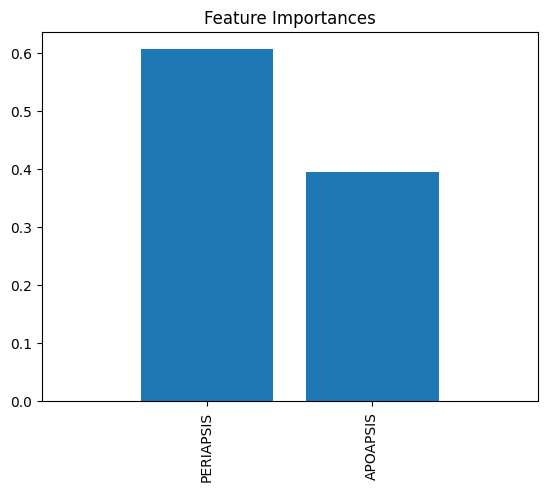

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Show feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Simulate trajectory data for training
time_steps = 200  # Number of time steps in the trajectory
angle = np.linspace(0, 2 * np.pi, time_steps)

# Simulating a circular orbit
trajectory_data = pd.DataFrame({
    'x': np.cos(angle) * 7000,  # Example: Radius 7000 km
    'y': np.sin(angle) * 7000,
    'z': np.zeros(time_steps)  # Assuming the orbit is in the xy-plane for simplicity
})

# Display the simulated trajectory data
print(trajectory_data.head())

# Preprocess the trajectory data
scaler = MinMaxScaler(feature_range=(0, 1))
trajectory_scaled = scaler.fit_transform(trajectory_data)

# Prepare the data for LSTM training
X = []
y = []

# Create sequences (example: using the last 60 timesteps to predict the next timestep)
for i in range(60, len(trajectory_scaled)):
    X.append(trajectory_scaled[i-60:i])
    y.append(trajectory_scaled[i])

X, y = np.array(X), np.array(y)

# Reshape the data to fit the LSTM input format
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(3))  # Assuming 3 outputs for x, y, z coordinates
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# Simulate separate test trajectory data
test_time_steps = 100  # Number of time steps in the test trajectory
test_angle = np.linspace(0, 2 * np.pi, test_time_steps)

# Simulating a slightly different circular orbit for testing
test_trajectory_data = pd.DataFrame({
    'x': np.cos(test_angle) * 7000,  # Example: Radius 7000 km
    'y': np.sin(test_angle) * 7000,
    'z': np.zeros(test_time_steps)  # Assuming the orbit is in the xy-plane for simplicity
})

# Preprocess the test trajectory data
trajectory_scaled_test = scaler.transform(test_trajectory_data)

# Prepare the data for LSTM testing
X_test_array = []

for i in range(60, len(trajectory_scaled_test)):
    X_test_array.append(trajectory_scaled_test[i-60:i])

X_test_array = np.array(X_test_array)

# Reshape to match the input shape expected by the LSTM model
X_test_array = X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], X_test_array.shape[2]))

# Now, use this reshaped array for prediction
predicted_trajectory = lstm_model.predict(X_test_array)
predicted_trajectory = scaler.inverse_transform(predicted_trajectory)  # Reverse scaling if needed

# Display the predicted trajectory
print("Predicted Trajectory:")
print(predicted_trajectory)


             x           y    z
0  7000.000000    0.000000  0.0
1  6996.511124  220.979848  0.0
2  6986.047973  441.739419  0.0
3  6968.620978  662.058655  0.0
4  6944.247510  881.717935  0.0
Epoch 1/20
4/4 [==============================] - 17s 836ms/step - loss: 0.1283 - val_loss: 0.2606
Epoch 2/20
4/4 [==============================] - 0s 114ms/step - loss: 0.0545 - val_loss: 0.1127
Epoch 3/20
4/4 [==============================] - 0s 111ms/step - loss: 0.0179 - val_loss: 0.0175
Epoch 4/20
4/4 [==============================] - 0s 111ms/step - loss: 0.0140 - val_loss: 0.0176
Epoch 5/20
4/4 [==============================] - 0s 113ms/step - loss: 0.0054 - val_loss: 0.0447
Epoch 6/20
4/4 [==============================] - 0s 111ms/step - loss: 0.0054 - val_loss: 0.0308
Epoch 7/20
4/4 [==============================] - 0s 104ms/step - loss: 0.0043 - val_loss: 0.0149
Epoch 8/20
4/4 [==============================] - 0s 104ms/step - loss: 0.0025 - val_loss: 0.0064
Epoch 9/20
4/4 [=======